In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('California Wildfire Damage.csv')
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [6]:
df['Cause'].value_counts()

,count
Cause,
Human Activity,38
Lightning,31
Unknown,31


In [7]:
df['Location'].value_counts()

,count
Location,
Shasta County,14
Sonoma County,12
San Diego County,12
Butte County,11
Mendocino County,11
Napa Valley,10
Orange County,9
Riverside County,8
Los Angeles County,7


In [8]:
df.describe()

,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,26531.460000,941.890000,251.570000,150.330000,42.040000,9.930000,2396.099300
std,14282.123824,543.019967,138.317761,88.471197,29.201467,5.682251,1430.439422
min,357.000000,18.000000,4.000000,5.000000,0.000000,0.000000,52.590000
25%,15916.250000,501.000000,134.750000,70.750000,16.000000,5.000000,1175.195000
50%,25618.000000,908.500000,256.500000,150.500000,37.000000,10.000000,2408.530000
75%,39775.000000,1401.750000,371.000000,229.750000,60.000000,14.250000,3662.110000
max,49653.000000,1968.000000,493.000000,300.000000,100.000000,20.000000,4866.990000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Incident_ID                           100 non-null    object        
 1   Date                                  100 non-null    datetime64[ns]
 2   Location                              100 non-null    object        
 3   Area_Burned (Acres)                   100 non-null    int64         
 4   Homes_Destroyed                       100 non-null    int64         
 5   Businesses_Destroyed                  100 non-null    int64         
 6   Vehicles_Damaged                      100 non-null    int64         
 7   Injuries                              100 non-null    int64         
 8   Fatalities                            100 non-null    int64         
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 10  Cau

In [13]:
df['Date'].min()

Timestamp('2014-02-03 00:00:00')

In [14]:
df['Date'].max()

Timestamp('2023-12-08 00:00:00')

In [15]:
numerical_col = df.select_dtypes(include = ['int64','float64']).columns
categorical_col = df.select_dtypes(include = ['object','datetime64[ns]']).columns
print(numerical_col)
print(categorical_col)

Index(['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed',
       'Vehicles_Damaged', 'Injuries', 'Fatalities',
       'Estimated_Financial_Loss (Million $)'],
      dtype='object')
Index(['Incident_ID', 'Date', 'Location', 'Cause'], dtype='object')


In [16]:
df['Year'] =df['Date'].dt.year
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity,2022
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown,2021
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown,2021


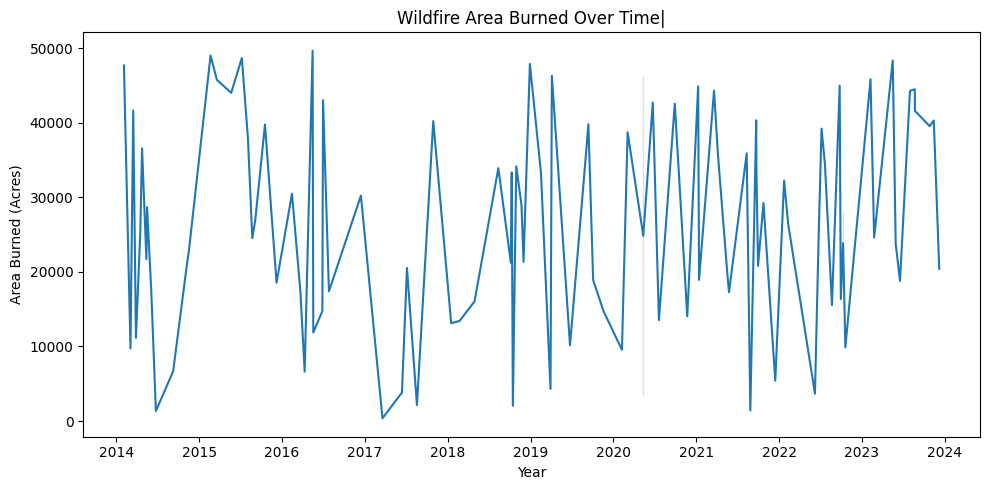

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,x = 'Date',y = 'Area_Burned (Acres)')
plt.title("Wildfire Area Burned Over Time|")
plt.xlabel('Year')
plt.ylabel('Area Burned (Acres)')
plt.tight_layout()
plt.show()

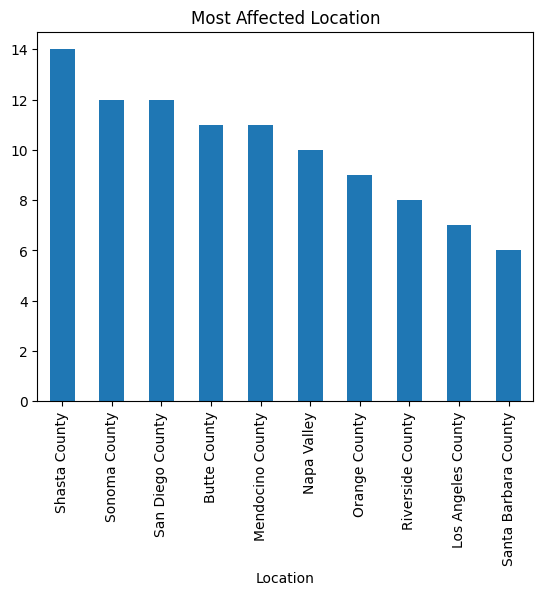

In [26]:
df['Location'].value_counts().plot(kind = 'bar')
plt.title('Most Affected Location')
plt.ylabel('')
plt.show()

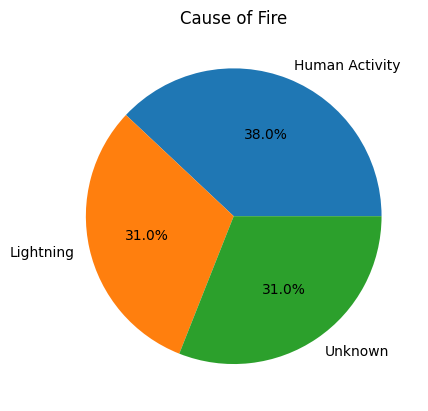

In [28]:
df['Cause'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Cause of Fire')
plt.ylabel('')
plt.show()

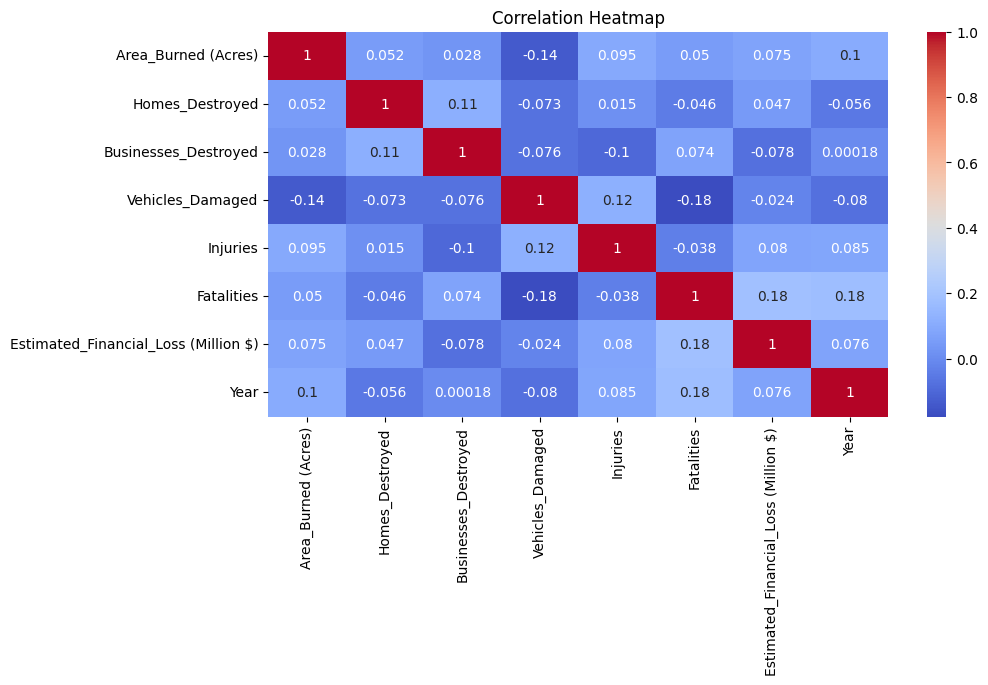

In [39]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
A_burned = df.groupby('Location')['Area_Burned (Acres)'].sum().sort_values(ascending = False).head(10)

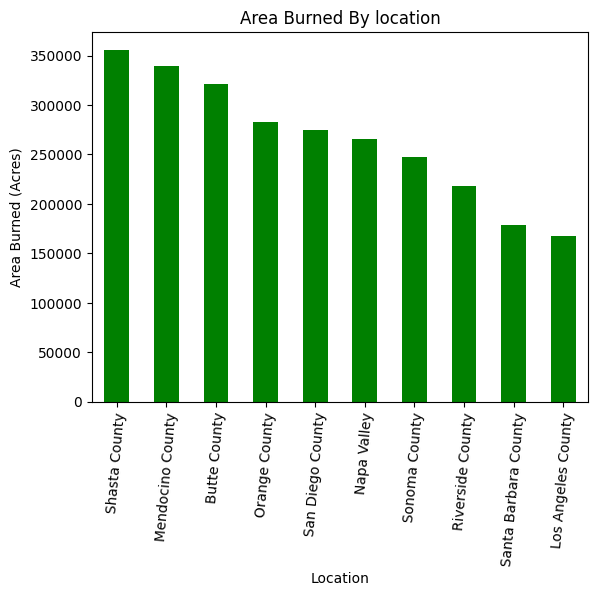

In [49]:
A_burned.plot(kind = 'bar',color ='green')
plt.xticks(rotation=85)
plt.xlabel('Location')
plt.ylabel('Area Burned (Acres)')
plt.title('Area Burned By location')
plt.show()

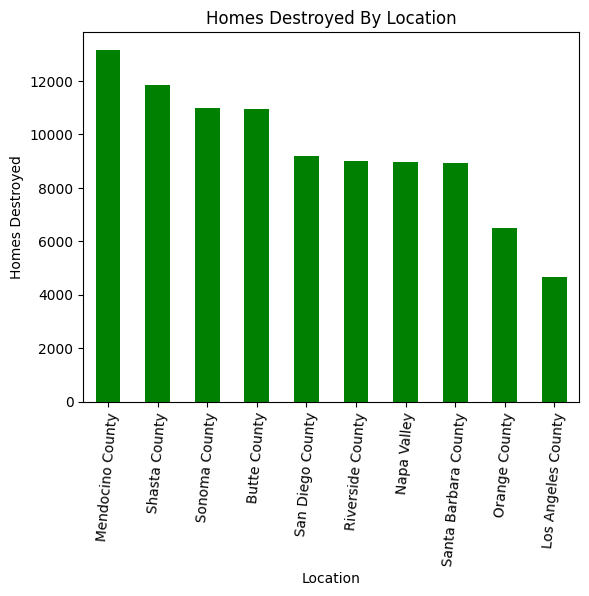

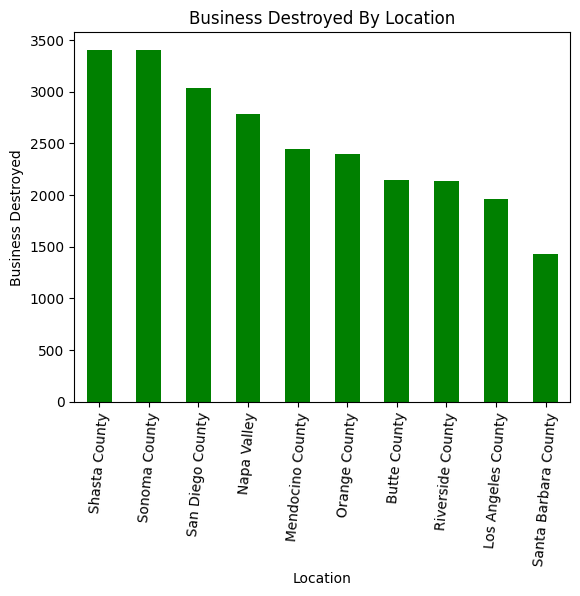

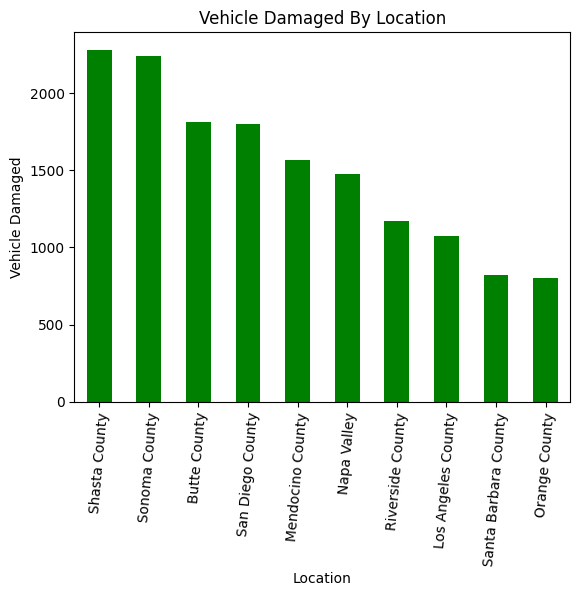

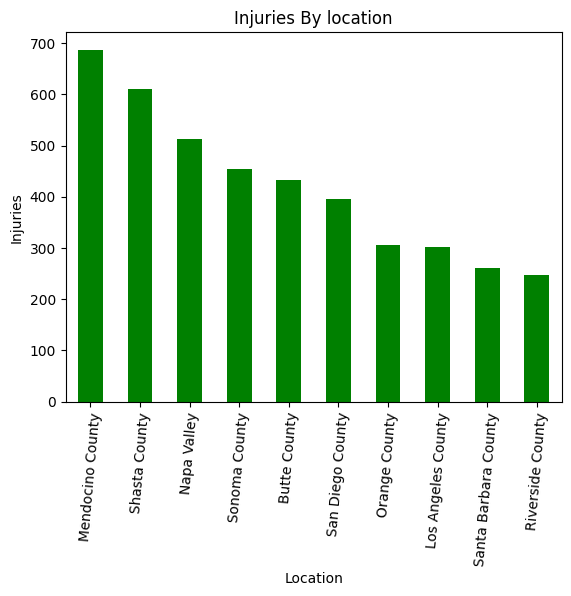

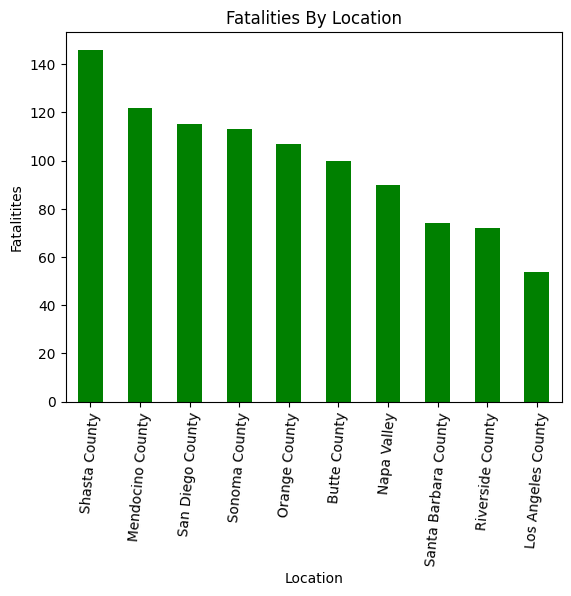

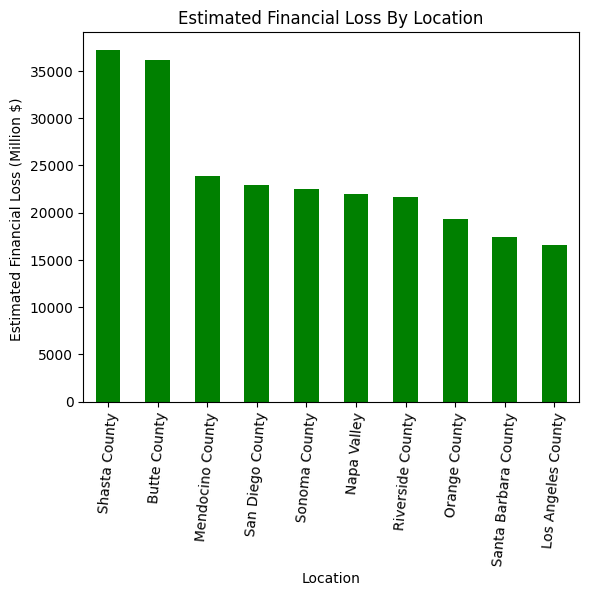

In [55]:
H_destroyed = df.groupby('Location')['Homes_Destroyed'].sum().sort_values(ascending = False).head(10)
H_destroyed.plot(kind = 'bar' , color = 'green')
plt.xticks(rotation = 85)
plt.xlabel('Location')
plt.ylabel('Homes Destroyed')
plt.title('Homes Destroyed By Location')
plt.show()

B_destroyed = df.groupby('Location')['Businesses_Destroyed'].sum().sort_values(ascending = False).head(10)
B_destroyed.plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 85)
plt.xlabel('Location')
plt.ylabel("Business Destroyed")
plt.title('Business Destroyed By Location')
plt.show()


V_damaged = df.groupby('Location')['Vehicles_Damaged'].sum().sort_values(ascending = False).head(10)
V_damaged.plot(kind = 'bar',color = 'green')
plt.xticks(rotation = 85)
plt.xlabel('Location')
plt.ylabel('Vehicle Damaged')
plt.title('Vehicle Damaged By Location')
plt.show()

I_damages = df.groupby('Location')['Injuries'].sum().sort_values(ascending = False).head(10)
I_damages.plot(kind='bar',color = 'green')
plt.xticks(rotation = 85)
plt.xlabel('Location')
plt.ylabel('Injuries')
plt.title('Injuries By location')
plt.show()

F_damaged = df.groupby('Location')['Fatalities'].sum().sort_values(ascending=False).head(10)
F_damaged.plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 85)
plt.xlabel('Location')
plt.ylabel('Fatalitites')
plt.title('Fatalities By Location')
plt.show()

l_damaged = df.groupby('Location')['Estimated_Financial_Loss (Million $)'].sum().sort_values(ascending = False).head(10)
l_damaged.plot(kind='bar',color = 'green')
plt.xticks(rotation = 85)
plt.xlabel('Location')
plt.ylabel('Estimated Financial Loss (Million $) ')
plt.title('Estimated Financial Loss By Location')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
features = ['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities']
target = 'Estimated_Financial_Loss (Million $)'

In [69]:
model_df = df[features + [target]].dropna()

In [70]:
X = model_df[features]
y = model_df[target]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)

In [80]:
y_pred

array([2271.53596513, 1931.8746965 , 1750.55449089, 2128.87666202,
       1462.26126954, 2975.42706392, 1003.7351935 , 1808.0926001 ,
       3156.65956584, 3097.88047068, 1743.55421417, 2674.30796313,
       2463.06664043, 2286.58464788, 2852.9175471 , 1813.4580556 ,
       1600.85718651, 2811.54933177, 3303.53752524, 2360.95126476])

In [81]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.09077137023826087


In [82]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2404740.465081581


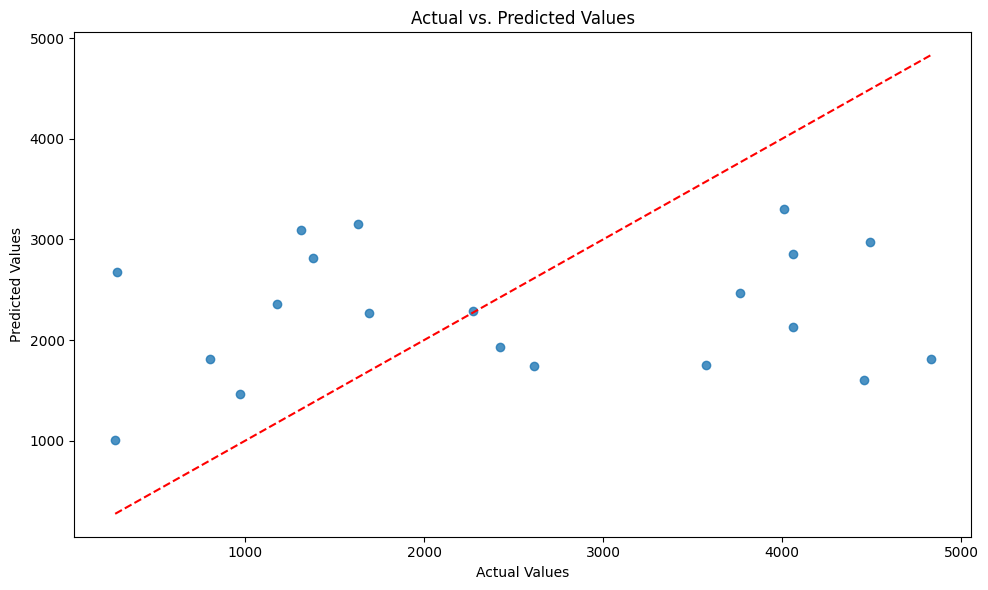

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,alpha = 0.8)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'r--')
plt.tight_layout()
plt.show()